<a href="https://colab.research.google.com/github/andre-sav/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import e, pi
from scipy import linalg

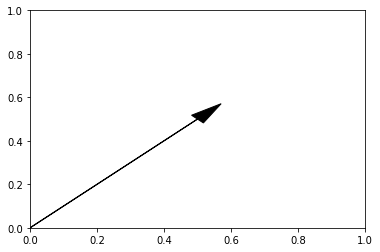

In [10]:
vector = np.array([.5,.5])

ax = plt.axes()

ax.arrow(0, 0, vector[0],vector[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

## 1.2 Create a three-dimensional vecor and plot it on a graph

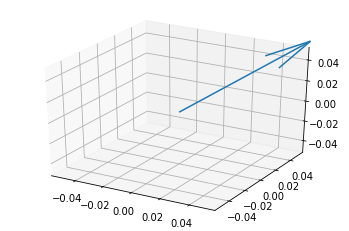

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

vector2 = np.array([.1, .1, .1])

ax.quiver(0, 0, 0, vector2[0], vector2[1], vector2[2], length=0.1, normalize=True)

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

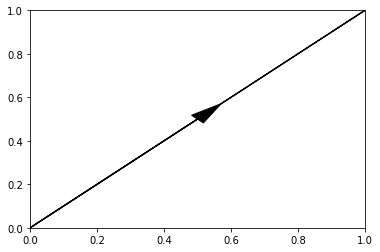

In [28]:
vectorfive = vector * 5
vectorpi = vector * pi
vectore = vector * -e

ax = plt.axes(autoscale_on=True)

ax.arrow(0, 0, vector[0],vector[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, vectorfive[0],vectorfive[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, vectorpi[0],vectorpi[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, vectore[0],vectore[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.show()

# they build on one another

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

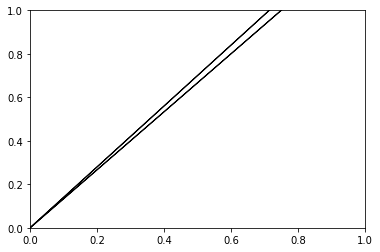

In [34]:
vector_a = np.array([5, 7])

vector_b = np.array([3, 4])

ax = plt.axes(autoscale_on=True)

ax.arrow(0, 0, vector_a[0],vector_a[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, vector_b[0],vector_b[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

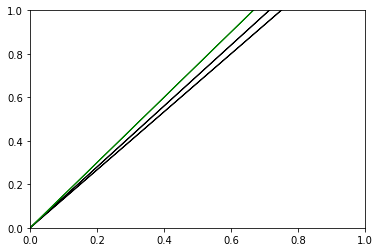

In [68]:
a_minus_b = vector_a - vector_b

a_minus_b

ax = plt.axes(autoscale_on=True)

ax.arrow(0, 0, vector_a[0],vector_a[1], head_width=0.05, head_length=0.1, fc='b', ec='k')
ax.arrow(0, 0, vector_b[0],vector_b[1], head_width=0.05, head_length=0.1, fc='g', ec='k')
ax.arrow(0, 0, a_minus_b[0],a_minus_b[1], head_width=0.05, head_length=0.1, fc='r', ec='g')

plt.show()

# there is a relationship

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
vector_c = np.array([7, 22, 4, 16])
vector_d = np.array([12, 6, 2, 9])

In [40]:
np.dot(vector_c, vector_d)

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [39]:
vector_e = np.array([5, 7, 2])

vector_f = np.array([3, 4, 6])

np.cross(vector_e, vector_f)

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [41]:
vector_e = np.array([1, 1, 1, 8])
vector_f = np.array([3, 3, 3, 3])

print(np.linalg.norm(vector_e))
print(np.linalg.norm(vector_f))

8.18535277187245
6.0


## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [49]:
vector_g = np.array([1, 0, -1])
vector_h = np.array([1, np.sqrt(2), 1])

np.dot(vector_g, vector_h)
# dot product is zero therefore orthogonal

0.0

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
a = np.array([[1, 2],[3,4],[5,6]])
b = np.array([[2, 4, 6]])
c = np.array([[9, 6, 3],[4,7,11]])
d = np.array([[1, 0, 0],[0,1,0],[0,0,1]])
e = np.array([[1, 3],[5,7]])

# A: 3X2 B: 1X3 C: 2X3 D: 3X3 C: 2X2

# AC, AE, CD, BD, DA, EC

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [59]:
np.dot(c, d) 

# dimension 3X3 same number of rows as first matrix same number of columns as second matrix

array([[ 9,  6,  3],
       [ 4,  7, 11]])

In [62]:
np.dot(a, e)
# dimension 3X2 same number of rows as first matrix same number of columns as second matrix

array([[11, 17],
       [23, 37],
       [35, 57]])

In [63]:
np.dot(b, a)
# dimension 3X1 same number of rows as first matrix same number of columns as second matrix

array([[44, 56]])

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [70]:
f = np.mat('20 19 18 17; 16 15 14 13; 12 11 10 9; 8 7 6 5; 4 3 2 1')

f.T

# the numbers along the main diagonal are the same on both matrices, the dimensions of F are 5X4 and F.T are 4X5

matrix([[20, 16, 12,  8,  4],
        [19, 15, 11,  7,  3],
        [18, 14, 10,  6,  2],
        [17, 13,  9,  5,  1]])

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
g = np.array([[12, 11], [7, 10]])

[## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
h = np.array([[12, 11], [7, 10]])
j = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])

In [74]:
np.linalg.norm(h)

20.346989949375804

In [75]:
np.linalg.norm(j)

13.527749258468683

## 3.3 Find H^{-1} and then find J^{-1}

In [81]:
h_neg = np.linalg.matrix_power(h, -1)

h_neg

array([[ 0.23255814, -0.25581395],
       [-0.1627907 ,  0.27906977]])

In [82]:
j_neg = np.linalg.matrix_power(j, -1)

j_neg

array([[ 0.4 , -0.2 ,  0.8 ],
       [-0.6 ,  0.3 , -0.7 ],
       [ 0.8 , -0.15,  0.35]])

## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [83]:
np.dot(h, h_neg)

array([[1.00000000e+00, 5.55111512e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [0]:
g_neg = np.linalg.matrix_power(g, -1)

In [86]:
np.dot(g_neg, g)

array([[1.00000000e+00, 6.66133815e-16],
       [1.11022302e-16, 1.00000000e+00]])

In [0]:
# yes it is the same because the products are the same

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

